<center><h1> TensorFlow 基础：线性回归</h1></center>

In [1]:
import pandas as pd          #导入库
MasterFile=pd.read_csv('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/FaceScore.csv')  #读入参考文件
print(MasterFile.shape)         #打印数组维度
MasterFile[0:5]              #打印前五个

(24, 2)


,Filename,Rating
0,ftw (1).jpg,4.083333
1,ftw (2).jpg,3.666667
2,ftw (3).jpg,1.916667
3,ftw (4).jpg,2.416667
4,ftw (5).jpg,3.166667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E51183E248>]],
      dtype=object)

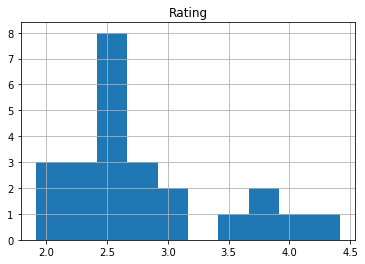

In [2]:
MasterFile.hist()     #绘制频次直方图

# 准备X+Y数据

In [3]:
import numpy as np
from PIL import Image   #导入处理图片的库

FileNames=MasterFile['Filename']   
N=len(FileNames)
IMSIZE=128           #设置种子数
X=np.zeros([N,IMSIZE,IMSIZE,3])    #返回一个和文件图片一致的用0填充的数组
for i in range(N):                     #循环导入文件
    MyFile=FileNames[i]
    Im=Image.open('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/image/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])     #图像的缩放
    Im=np.array(Im)/255               
    X[i,]=Im                          
Y=np.array(MasterFile['Rating']).reshape([N,1])    #构建数组形式
Y=(Y-np.mean(Y))/np.std(Y)                      #标准化每个变量

# 切分：Training+Validation

In [4]:
from sklearn.model_selection import train_test_split     #构造训练集和测试集
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.5,random_state=0)

# 颜值数据展示

E:\Anaconda3\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

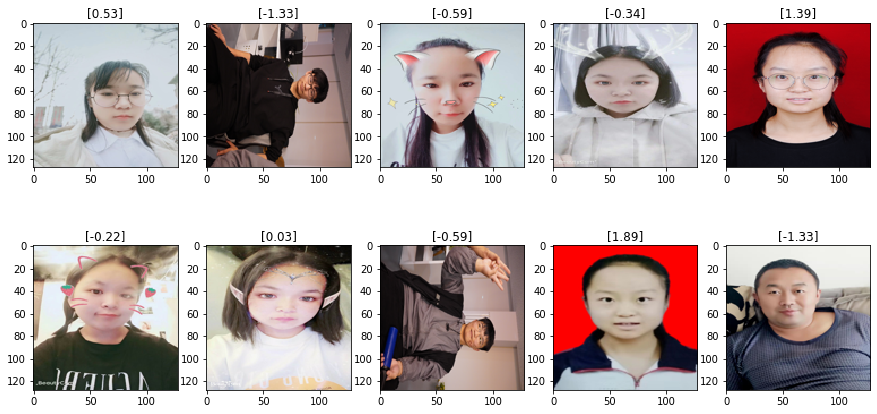

In [5]:
from matplotlib import pyplot as plt        #导入绘图库
plt.figure()                               #设置画布
fig,ax=plt.subplots(2,5)        
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):              #展示10张照片的颜值
    ax[i].imshow(X0[i,:,:,:])
    ax[i].set_title(np.round(Y0[i],2))

# TensorFlow 实现：模型设计

In [6]:
from keras.layers import Dense, Flatten, Input          #导入keras模型
from keras import Model

input_layer=Input([IMSIZE,IMSIZE,3])     #输入数组
x=input_layer
x=Flatten()(x)   # 返回一个一维数组
x=Dense(1)(x)    # 全连接层，实现对神经网络里的神经元激活。
output_layer=x                  #输出颜值
model=Model(input_layer,output_layer)   #建立模型
model.summary()              #描述模型的统计变量

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49153     
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


# TensorFlow 实现：施工方案


$$\mbox{MSE}=\sum_{i=1}^n \Big (Y_i-\beta_0-\sum_{i=1}^p\sum_{j=1}^q \sum_{k=1}^3 X_{ijk}\beta_{ijk} \Big)^2.$$


In [7]:
from keras.optimizers import Adam    
model.compile(loss='mse',optimizer=Adam(lr=0.01),metrics=['mse'])    #将一个字符串编译为字节代码

# TensorFlow 实现：建立模型

In [8]:
model.fit(X0,Y0,
          validation_data=[X1,Y1],
          batch_size=100,
          epochs=10)     #求得训练集X的均值，方差，最大值，最小值，这些训练集X固有的属性

Epoch 1/10
1/1 [==============================] - 0s 110ms/step - loss: 1.4794 - mse: 1.4794 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 32008.7812 - mse: 32008.7812 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 2234.1211 - mse: 2234.1211 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 25698.6582 - mse: 25698.6582 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 17052.8301 - mse: 17052.8301 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 1793.9028 - mse: 1793.9028 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 4648.7139 - mse: 4648.7139 - val_loss: 0.0000e+00 - val_mse: 0.0000e+0

# 模型预测：给照片打分

array([[-9.597816]], dtype=float32)

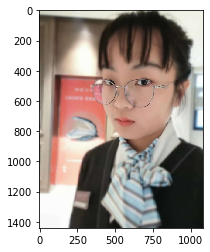

In [10]:
MyPic=Image.open('F:/图片/刘嘉玲/一张严肃的照片.jpg')   #导入测试照片
plt.imshow(MyPic)                                      #打印该照片
MyPic=MyPic.resize((IMSIZE,IMSIZE))                   #图片缩放
MyPic=np.array(MyPic)/255                           #构建数组
MyPic=MyPic.reshape((1,IMSIZE,IMSIZE,3))            # 改变数组的形状          
model.predict(MyPic)                               #模型预测

# 思考题：请问还有那些有趣的应用场景？

1、服装搭配打分。
2、婚恋市场精准匹配。 